# Putting it all together

1. Get data
2. Find missing values
3. Find outliers
4. Find correlations
5. Drop closely correlated values
6. Split data into train/test
7. Choose a model
8. Fit the model
9. Predict
10. Test accuracies

In [1]:
# Starter libraries and iPython magic
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Get data from sklearn datasets
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Any mising values? Let's first use describe
df.describe()
# Count shows none

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().any().any()
# isnull shows no null values too

False

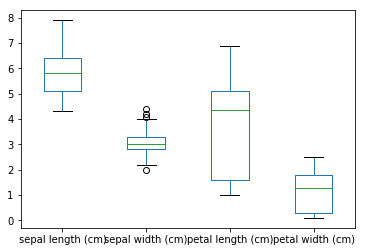

In [6]:
# How about outliers. Let's use boxplot
df.plot(kind='box')
plt.show()
# sepal width shows some very near-outliers, but let's ignore that

In [7]:
# How about correlations?
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


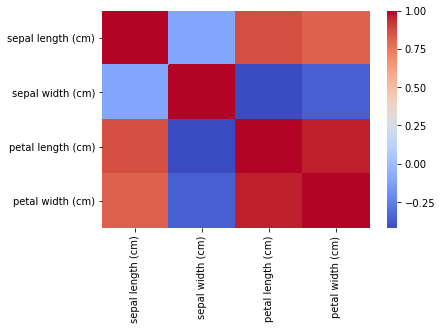

In [8]:
# Let's plot the correlations on a map using sns.heatmap
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [9]:
# Too much correlation between petal length and petal width (96%) so we drop one of them (petal length, since it's also rather strongly correlated with sepal length too (87%))
df = df.drop(['petal length (cm)'], axis=1)

In [10]:
df.corr()

,sepal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.817954
sepal width (cm),-0.109369,1.000000,-0.356544
petal width (cm),0.817954,-0.356544,1.000000


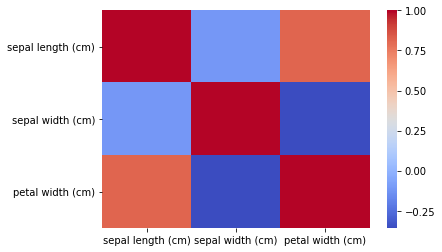

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

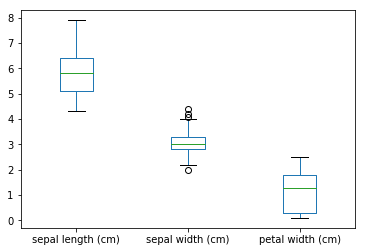

In [12]:
df.plot(kind='box')
plt.show()

In [13]:
# Okay so up next, data split

In [14]:
from sklearn.model_selection import train_test_split
X = np.array(df) # y already exists as an array
y = np.ravel(y.copy())

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100, 3) (100,) (50, 3) (50,)


In [16]:
# Modeling
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
# Check for model accuracy
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [19]:
print('Model Accuracy is {:.3f}'.format(accuracy_score(y_test, rfc.predict(X_test))))
print('Model R squared score is {:.3f}'.format(r2_score(y_test, rfc.predict(X_test))))
print(classification_report(y_test, rfc.predict(X_test)))

Model Accuracy is 0.960
Model R squared score is 0.943
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.93      0.93      0.93        15
          2       0.94      0.94      0.94        16

avg / total       0.96      0.96      0.96        50



In [20]:
# Let's predict something, right?
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal width (cm),target
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


In [21]:
from random import randint
# Get random point in dataset
x = df.iloc[randint(0,150)]
# Get individual items in x
sepal_length, sepal_width, petal_width =  x[[0,1,2]]
print(x)
print()
print('Predicted group for flower with sepal length {0}, sepal width {1} and petal width {2} is {3}'.format(sepal_length, sepal_width, petal_width, rfc.predict([[sepal_length, sepal_width, petal_width]])[0]))

sepal length (cm)    7.4
sepal width (cm)     2.8
petal width (cm)     1.9
target               2.0
Name: 130, dtype: float64

Predicted group for flower with sepal length 7.4, sepal width 2.8 and petal width 1.9 is 2
